# Load Data

!git clone https://github.com/rickiepark/GDL_code.git
cd GDL_code 

In [6]:
!git pull
pip install virtualenv virtualenvwrapper

Already up to date.


In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0 # image data are consisted with 255 integers
x_test = x_test.astype('float32') / 255.0 # -1, 0, 1 is the most desirable range of data to execute

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [16]:
x_train[54,12,13,1] # 4 dimensinal tensor

0.36862746

# Make Model

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation='softmax'),
])

In [18]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_15 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Model Compile

In [20]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Model Training

In [21]:
model.fit(x_train
         , y_train
         , batch_size = 32
         , epochs = 10
         , shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8469 - accuracy: 0.3334
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6670 - accuracy: 0.4044
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5784 - accuracy: 0.4369
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5207 - accuracy: 0.4587
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4827 - accuracy: 0.4718
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4457 - accuracy: 0.4874
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4207 - accuracy: 0.4973
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3967 - accuracy: 0.5042
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3717 - accuracy: 0.5124
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.349

# Model Evaluation

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 637us/step - loss: 1.4182 - accuracy: 0.4990


[1.418154001235962, 0.49900001287460327]

In [23]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

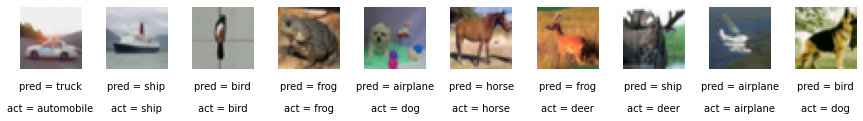

In [25]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)